In [5]:
# ## Mount on google drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [6]:
import config
import os
os.chdir(config.root)
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from utils.tiff_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.imgPatch import imgPatch


In [7]:
# satellite images 
scene_name = 'l5_scene_01'
path_img = config.root + '/data/dataset-l578/' + scene_name+ '.tif'
path_wat_map = config.root + '/data/tmp/'+ scene_name + '_cla.tif'
img_src, img = readTiff(path_in=path_img)
img = np.float32(np.clip(img/10000, a_min=0, a_max=1))     ### normalization
print(img.shape)


(1249, 1326, 6)


In [8]:
# pre-trained model
path_model =  config.root + '/model/pretrained/WatNet.h5'
# super parameters
model = tf.keras.models.load_model(path_model)  # load model


In [19]:
# surface water mapping from sentinel-2 image
imgPat_ins = imgPatch(img=img, patch_size=512, edge_overlay = 160)
patch_list, start_list, img_patch_row, img_patch_col = imgPat_ins.toPatch()
result_patch_list = [model(patch[np.newaxis, :]) for patch in patch_list]
result_patch_list = [np.squeeze(patch, axis = 0) for patch in result_patch_list]
pro_map = imgPat_ins.toImage(result_patch_list, img_patch_row, img_patch_col)
cla_map = np.where(pro_map>0.5, 1, 0)
cla_map = np.int8(cla_map)

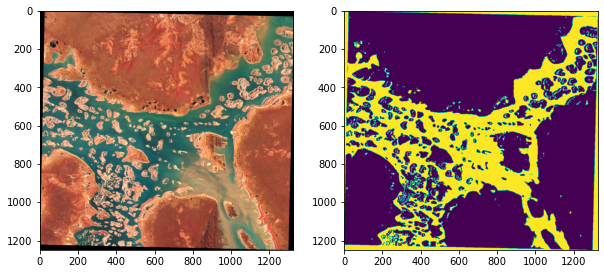

In [20]:
# cla_map_result, geotrans_s2, proj_s2, row_s2, col_s2, bands_s2 = readTiff(path_in=path_water_map)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
imgShow(img, col_bands=(3,2,1), clip_percent=2)
plt.subplot(1,2,2)
imgShow(cla_map, col_bands=(0,0,0), clip_percent=1)

In [22]:
# save the result
# writeTiff(im_data=cla_map, im_transform=img_src.transform, im_crs=img_src.crs, path_out=path_wat_map)
